# Loading DB

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
digits = load_digits()

In [3]:
X, y = digits.data, digits.target

In [4]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
X.shape

(1797, 64)

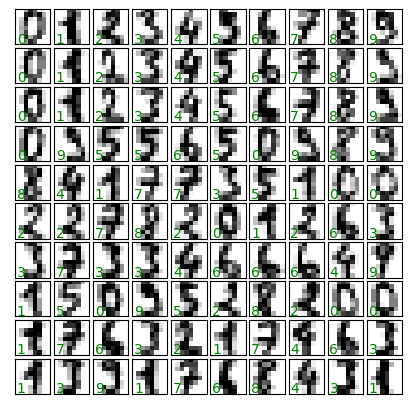

In [7]:
fig, axes = plt.subplots(10, 10, figsize=(5, 5),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.7, random_state=41)

Importing the data

In [9]:
import json

# Assuming your JSON file is named 'data.json'
file_path = 'data.json'

# Load the JSON data
with open(file_path, 'r') as f:
    data = json.load(f)

# Access the data
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']

# Convert lists to NumPy arrays
X_train = np.array(data['X_train'])
y_train = np.array(data['y_train'])
X_test = np.array(data['X_test'])
y_test = np.array(data['y_test'])

# Now you can use X_train, y_train, X_test, y_test as needed
# Example:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1257, 64)
Shape of y_train: (1257,)
Shape of X_test: (540, 64)
Shape of y_test: (540,)


# Feature Selection

In [10]:
from sklearn.feature_selection import VarianceThreshold

## P = 0.8

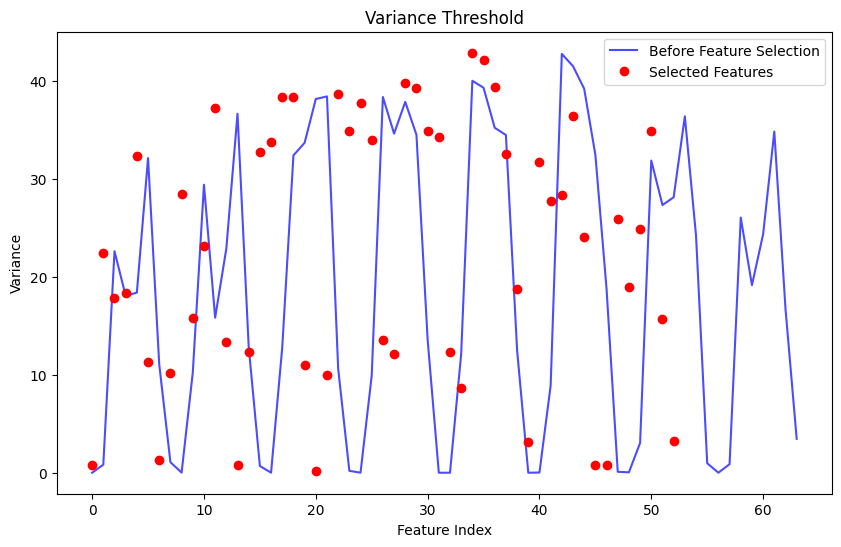

Number of selected features (VarianceThreshold): 53


In [27]:
# Calculate variances of features before feature selection
variances_before = np.var(X, axis=0)
# Apply VarianceThreshold feature selection
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_fs_p80 = sel.fit_transform(X_train)
# Calculate variances of features after feature selection
variances_after = np.var(X_fs_p80, axis=0)
# Plot variances before and after feature selection
plt.figure(figsize=(10, 6))
plt.plot(variances_before, label='Before Feature Selection', color='blue', alpha=0.7)
plt.plot(variances_after, 'ro', label='Selected Features')
plt.title("Variance Threshold")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.legend()
plt.show()
# Print the number of selected features
num_selected_features = X_fs_p80.shape[1]
print("Number of selected features (VarianceThreshold):", num_selected_features)

--------------------------------------------------------------------------------------------------------------------------------------------
The graph you provided is a visualization of the variance of features before and after applying feature selection using VarianceThreshold.

The x-axis represents the feature index, and the y-axis represents the variance. The blue line shows the variance of each feature before feature selection. The red circles show the variance of the features that were selected after applying the VarianceThreshold filter.

The code you provided calculates the variance of each feature before applying the filter (variances_before) and after applying the filter (variances_after). It then plots these variances on the same graph. The threshold used for the VarianceThreshold filter is not shown in the graph, but it determines which features are considered to have low variance and are removed.

----------------------------------------------------------------------------------------------------------------------------------------------

# Feature Extraction

In [12]:
from sklearn.decomposition import PCA

## P = 0.8

[2,5,7,9,10,12,15,20,30]

In [13]:
pca = PCA(n_components = 2)
X_fe_2 = pca.fit_transform(X_fs_p80)
X_fe_2.shape

(1257, 2)

In [14]:
pca = PCA(n_components = 5)
X_fe_5 = pca.fit_transform(X_fs_p80)
X_fe_5.shape

(1257, 5)

In [15]:
pca = PCA(n_components = 7)
X_fe_7 = pca.fit_transform(X_fs_p80)
X_fe_7.shape

(1257, 7)

In [16]:
pca = PCA(n_components = 9)
X_fe_9 = pca.fit_transform(X_fs_p80)
X_fe_9.shape

(1257, 9)

In [17]:
pca = PCA(n_components = 10)
X_fe_10 = pca.fit_transform(X_fs_p80)
X_fe_10.shape

(1257, 10)

In [18]:
pca = PCA(n_components = 12)
X_fe_12 = pca.fit_transform(X_fs_p80)
X_fe_12.shape

(1257, 12)

In [19]:
pca = PCA(n_components = 15)
X_fe_15 = pca.fit_transform(X_fs_p80)
X_fe_15.shape

(1257, 15)

In [20]:
pca = PCA(n_components = 20)
X_fe_20 = pca.fit_transform(X_fs_p80)
X_fe_20.shape

(1257, 20)

In [21]:
pca = PCA(n_components = 30)
X_fe_30 = pca.fit_transform(X_fs_p80)
X_fe_30.shape

(1257, 30)

# Model

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Define list of numbers of components for PCA
num_components_list = [2, 5, 7, 9, 10, 12, 15, 20, 30]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train_fs = sel.fit_transform(X)


## Default parameters

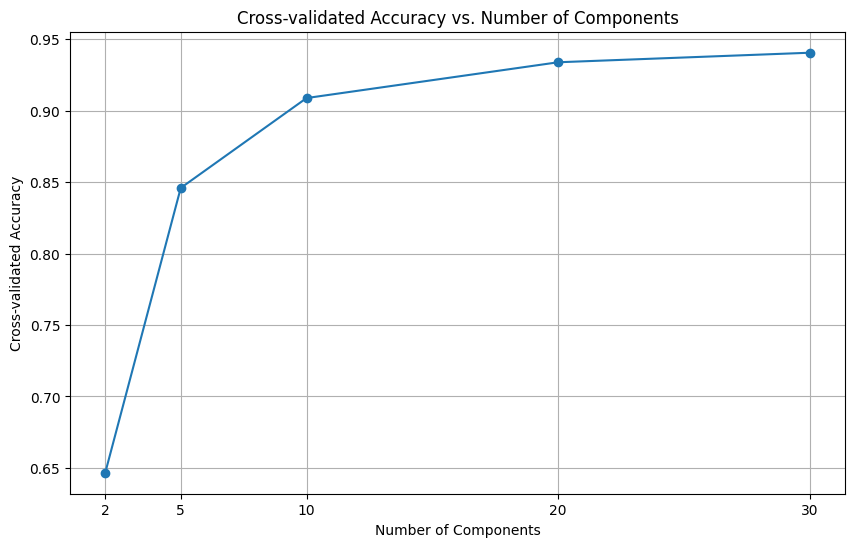

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, KFold


# Initialize Gaussian Naive Bayes classifier
clf = GaussianNB()

# Store accuracies
accuracies = []

# Perform 10-fold cross-validation for each number of components
for num_components in num_components_list:
    # Feature extraction using PCA
    pca = PCA(n_components=num_components)
    X_fe = pca.fit_transform(X_train_fs)
    
    # Perform 10-fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(clf, X_fe, y, cv=kf)
    
    # Average cross-validation score
    avg_accuracy = np.mean(cv_scores)
    accuracies.append(avg_accuracy)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(num_components_list, accuracies, marker='o', linestyle='-')
plt.title('Cross-validated Accuracy vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cross-validated Accuracy')
plt.xticks(num_components_list)
plt.grid(True)
plt.show()


## Random parameters priors

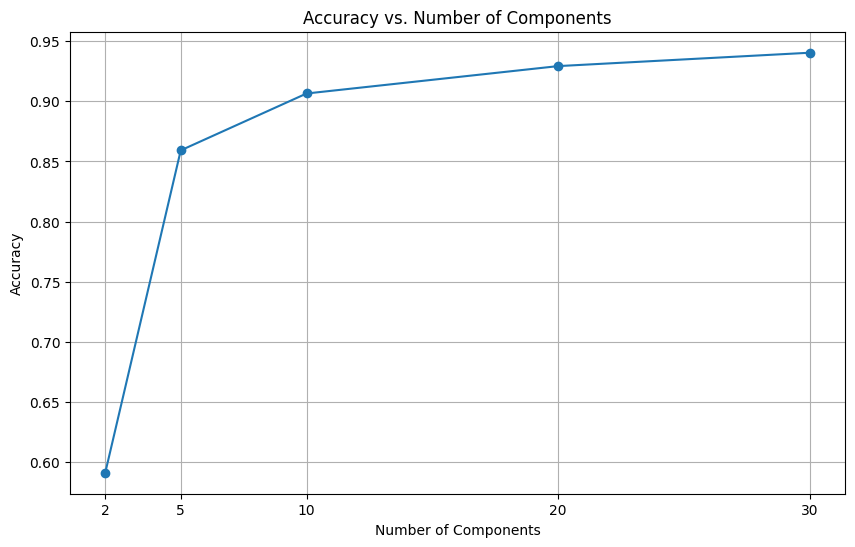

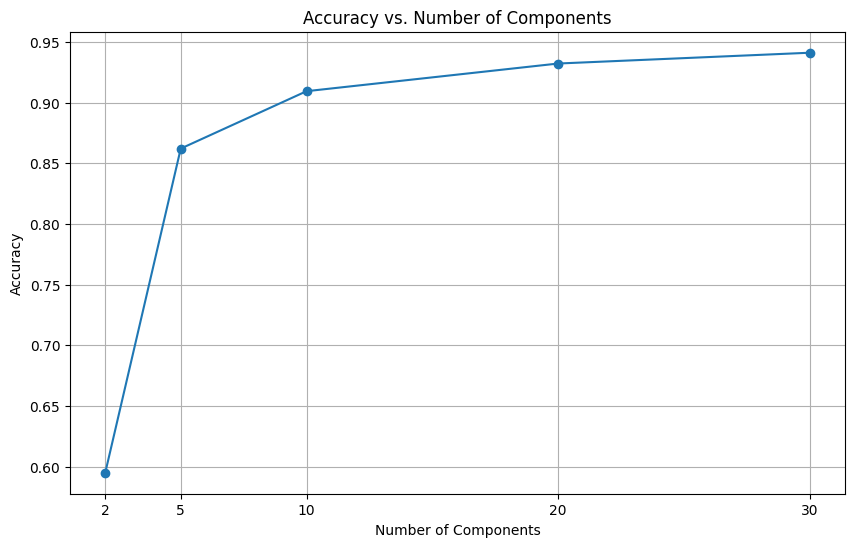

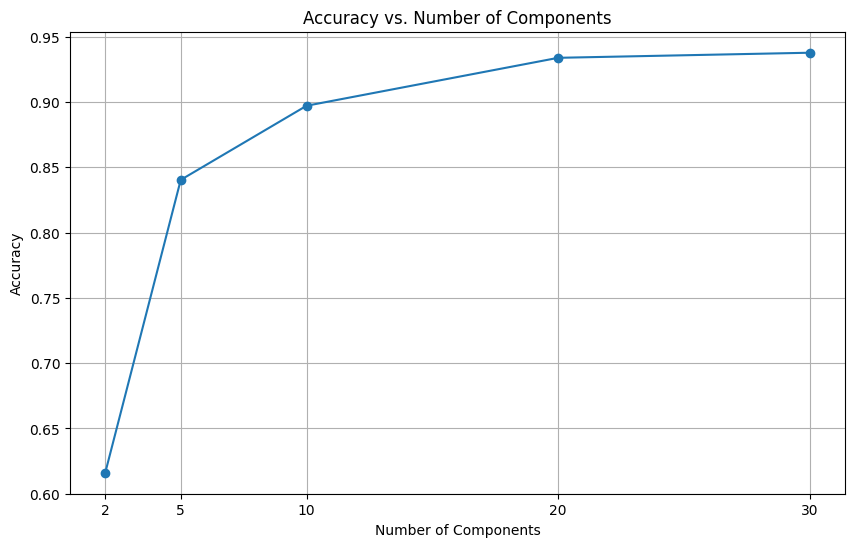

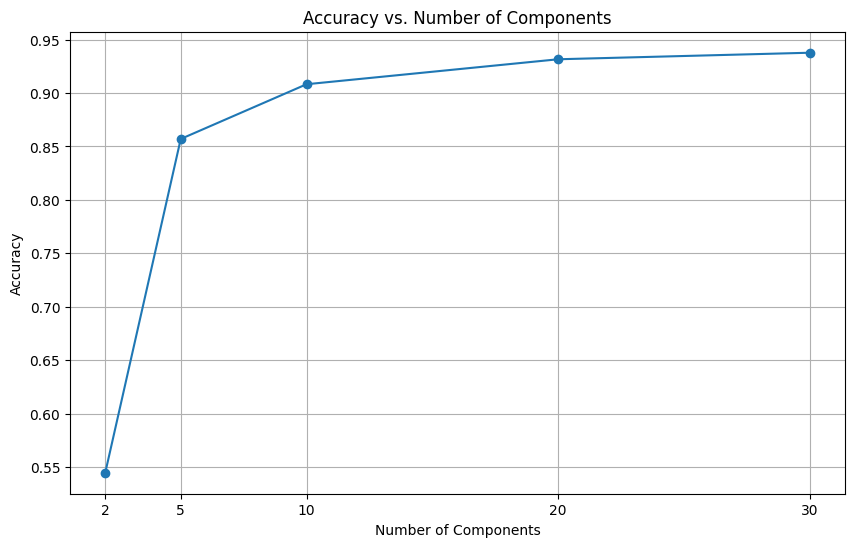

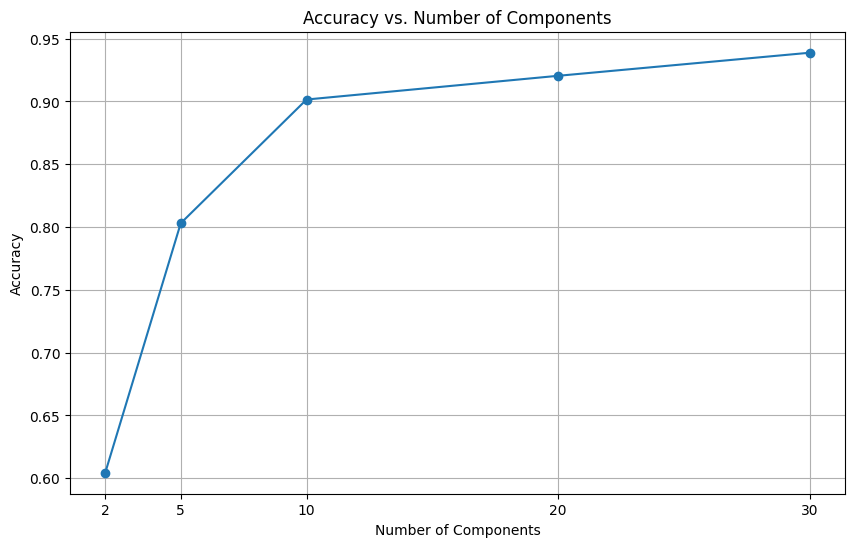

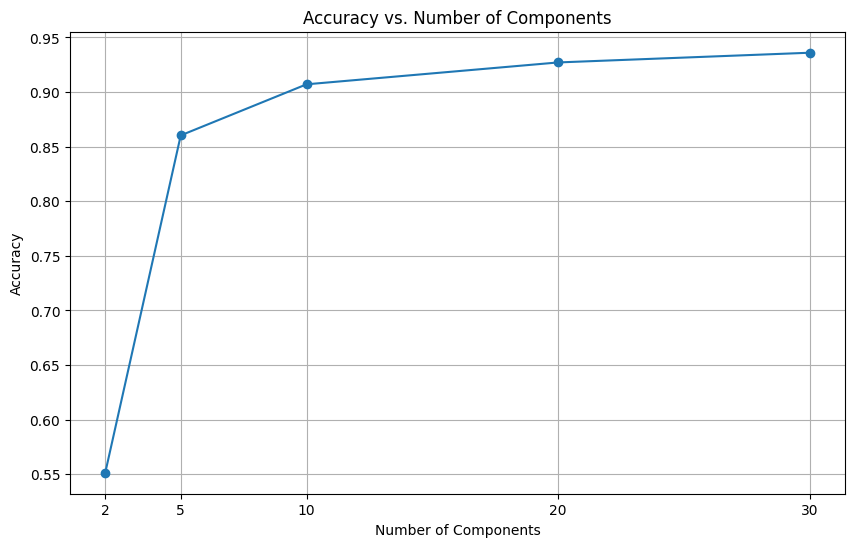

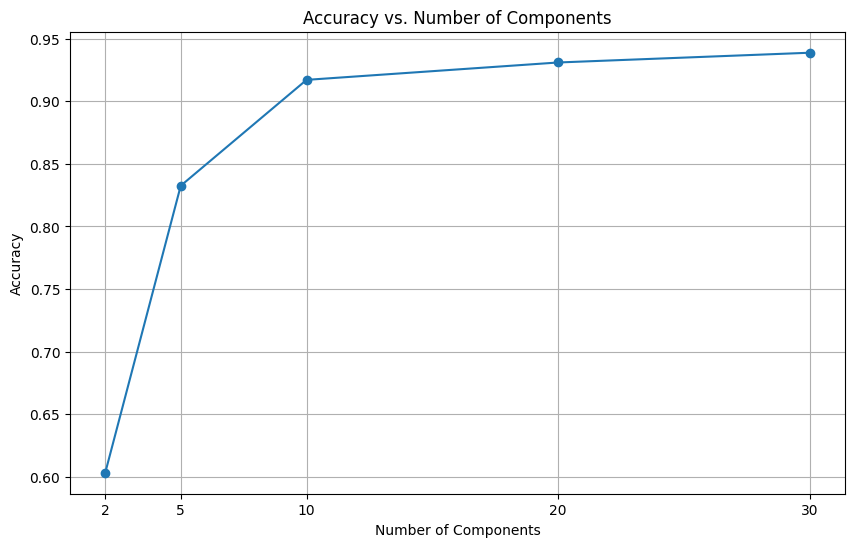

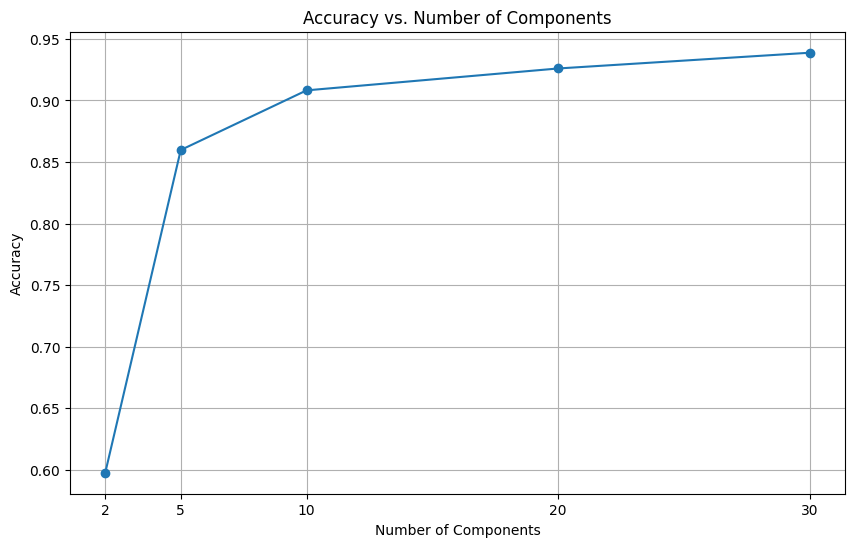

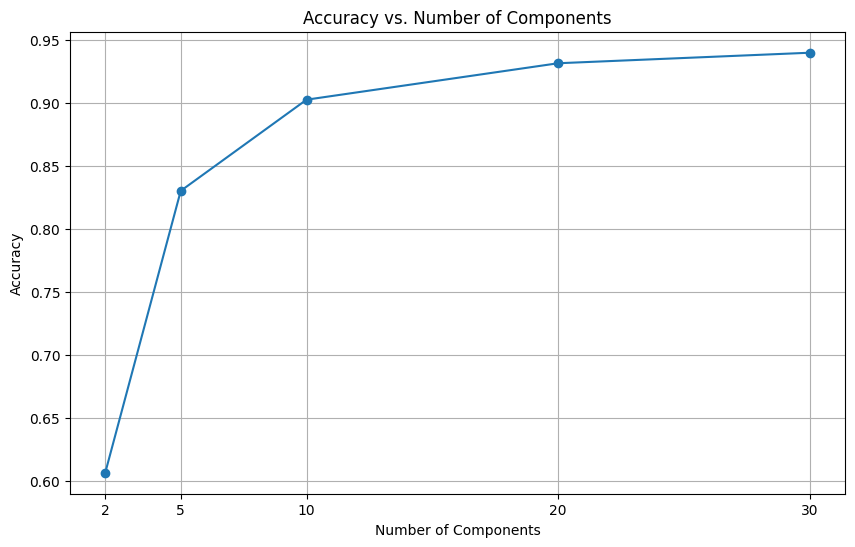

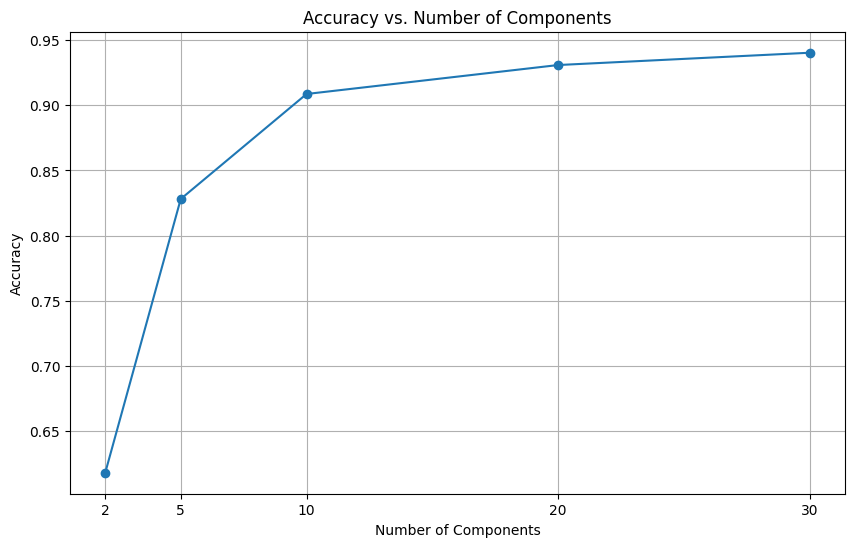

Iteration 1:
Best Parameters: {'num_components': 30, 'custom_priors': array([0.20430898, 0.11951782, 0.07103854, 0.09268464, 0.12840781,
       0.0303563 , 0.112741  , 0.08099007, 0.12343987, 0.03651498]), 'accuracy': 0.9404655493482309}

Iteration 2:
Best Parameters: {'num_components': 30, 'custom_priors': array([0.15985765, 0.06253442, 0.04683792, 0.19338876, 0.15300816,
       0.12487768, 0.03088458, 0.05348772, 0.05939081, 0.11573229]), 'accuracy': 0.941024208566108}

Iteration 3:
Best Parameters: {'num_components': 30, 'custom_priors': array([0.02488076, 0.13910007, 0.06402924, 0.15548313, 0.06257414,
       0.04176318, 0.10248868, 0.17876184, 0.17770686, 0.0532121 ]), 'accuracy': 0.93768156424581}

Iteration 4:
Best Parameters: {'num_components': 30, 'custom_priors': array([0.15029213, 0.04542329, 0.08455896, 0.03163962, 0.08173251,
       0.13968836, 0.17652822, 0.09152221, 0.12346134, 0.07515336]), 'accuracy': 0.93768156424581}

Iteration 5:
Best Parameters: {'num_components': 

In [32]:
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score

# Define ranges for random hyperparameters
prior_min = 0.1
prior_max = 0.9

# Store results
results = []

# Perform the experiment 10 times
for _ in range(10):
    # Store accuracies for each iteration
    accuracies = []

    # Train and evaluate models with different numbers of components for PCA
    for num_components in num_components_list:
        # Generate random hyperparameters
        custom_priors = [random.uniform(prior_min, prior_max) for _ in range(10)]  # Generate 10 random priors
        custom_priors = np.array(custom_priors) / sum(custom_priors)  # Normalize to ensure sum equals 1

        # Initialize Gaussian Naive Bayes classifier with random hyperparameters
        clf = GaussianNB(priors=custom_priors)

        # Perform 10-fold cross-validation
        kf = KFold(n_splits=10, shuffle=True, random_state=42)
        fold_accuracies = []

        for train_index, test_index in kf.split(X_train_fs):
            # Split data into train and test folds
            X_train_fold, X_test_fold = X_train_fs[train_index], X_train_fs[test_index]
            y_train_fold, y_test_fold = y[train_index], y[test_index]

            # Feature extraction using PCA
            pca = PCA(n_components=num_components)
            X_train_fe = pca.fit_transform(X_train_fold)
            X_test_fe = pca.transform(X_test_fold)

            # Train the classifier
            clf.fit(X_train_fe, y_train_fold)

            # Make predictions
            y_pred_fold = clf.predict(X_test_fe)

            # Calculate accuracy for this fold
            fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
            fold_accuracies.append(fold_accuracy)

        # Average accuracy across folds
        avg_accuracy = np.mean(fold_accuracies)
        accuracies.append(avg_accuracy)

    # Store the results for this iteration
    best_accuracy = max(accuracies)
    best_parameters_index = accuracies.index(best_accuracy)
    best_parameters = {
        'num_components': num_components_list[best_parameters_index],
        'custom_priors': custom_priors,
        'accuracy': best_accuracy
    }
    results.append(best_parameters)

    # Plot results for this iteration
    plt.figure(figsize=(10, 6))
    plt.plot(num_components_list, accuracies, marker='o', linestyle='-')
    plt.title('Accuracy vs. Number of Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Accuracy')
    plt.xticks(num_components_list)
    plt.grid(True)
    plt.show()

# Print the results
for i, result in enumerate(results, 1):
    print(f"Iteration {i}:")
    print("Best Parameters:", result)
    print()


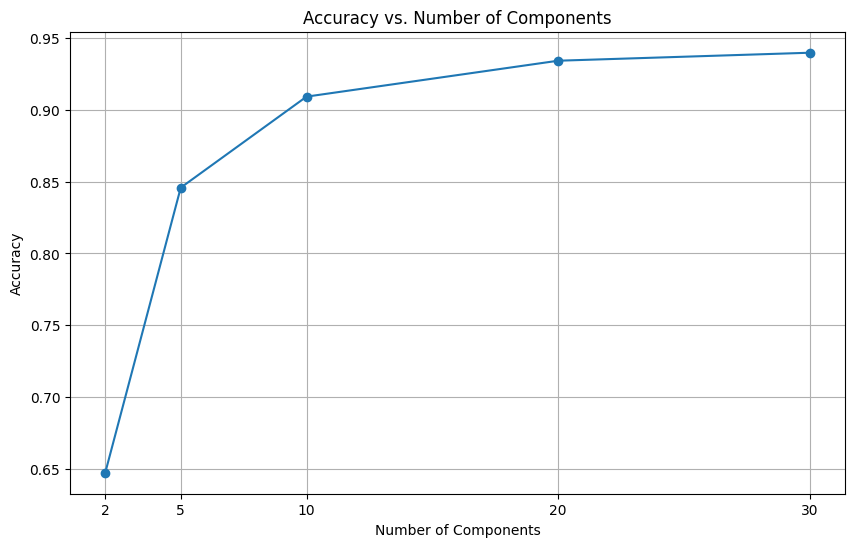

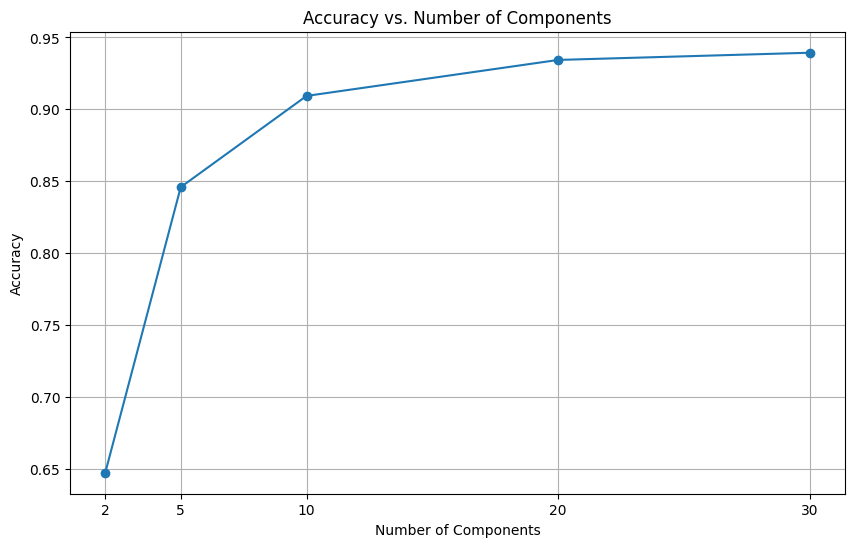

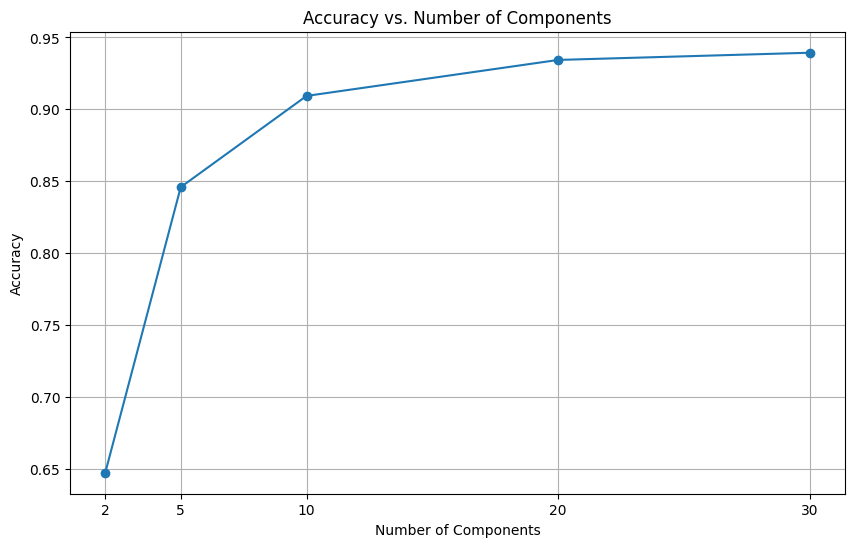

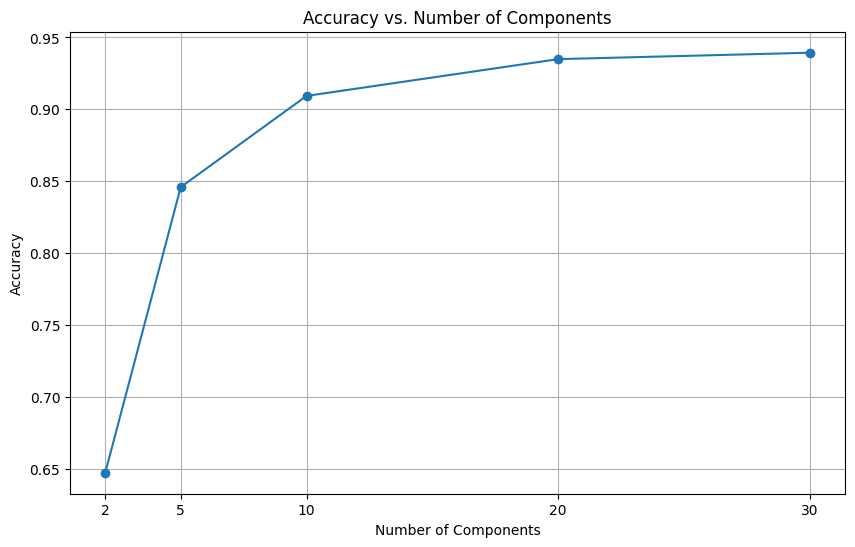

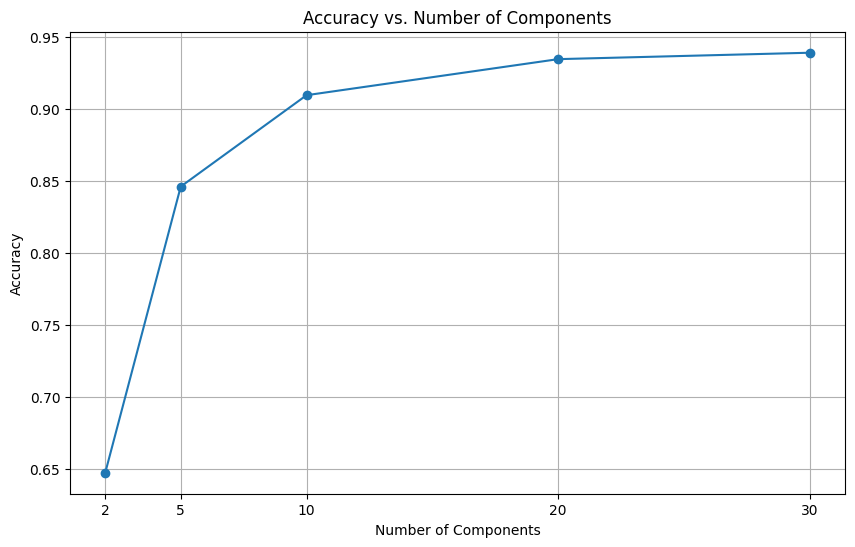

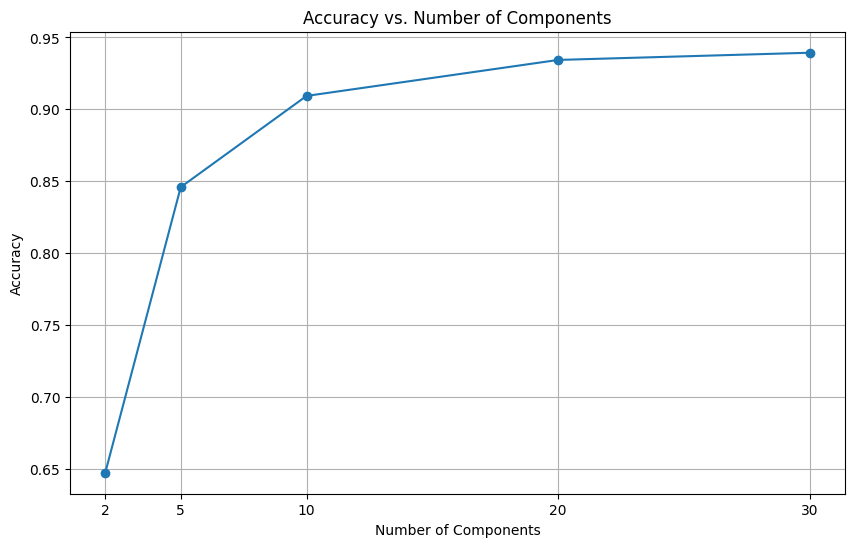

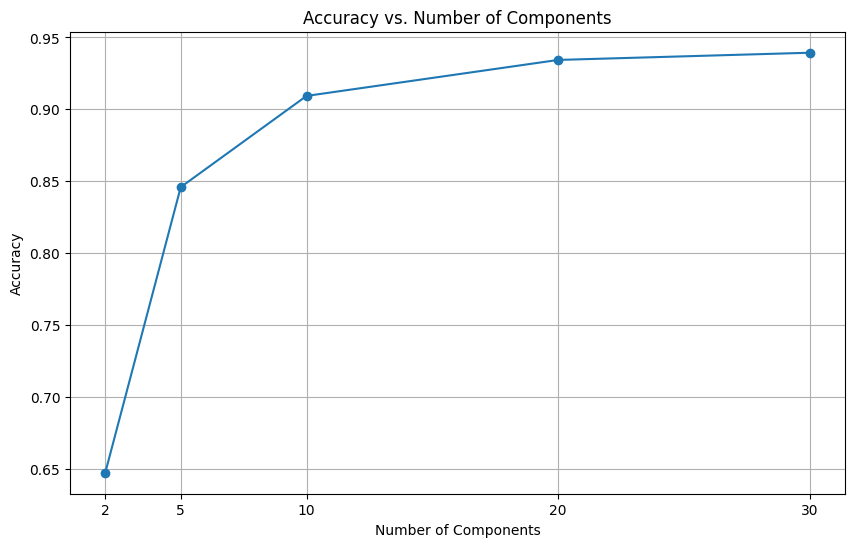

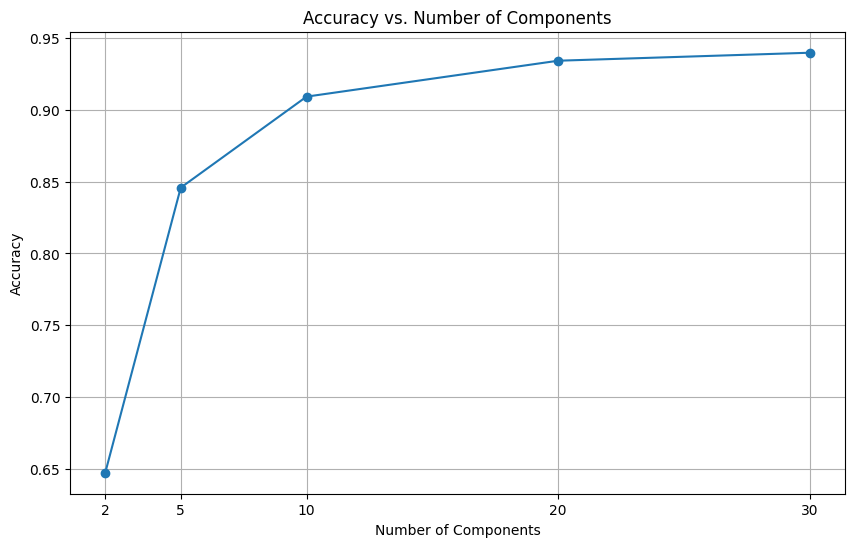

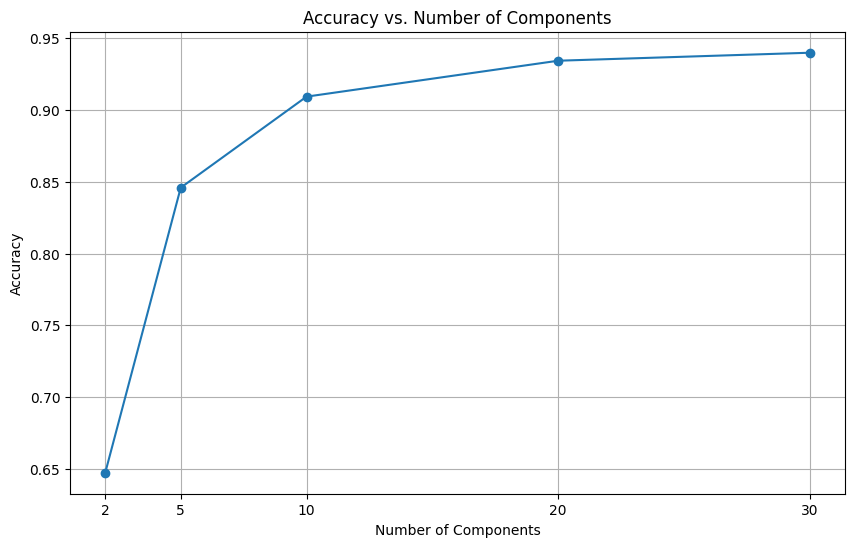

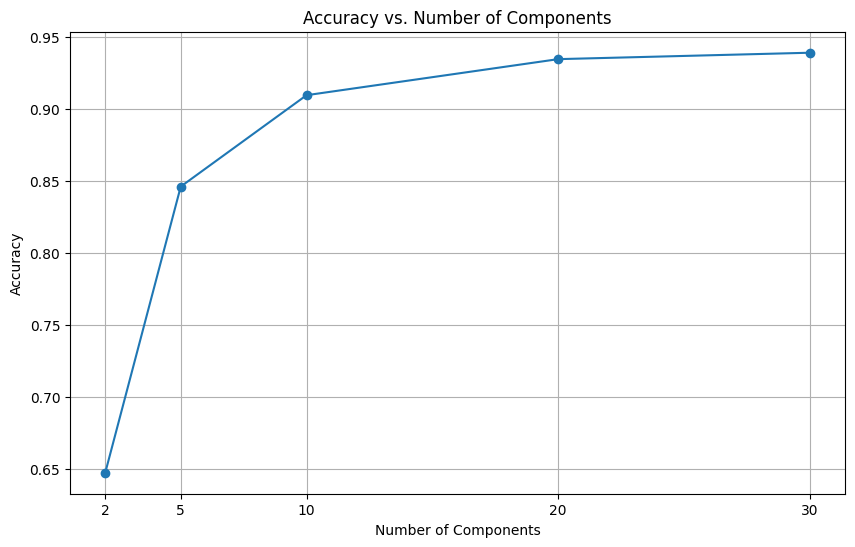

Iteration 1:
Best Parameters: {'num_components': 30, 'var_smoothing': 7.954265408909954e-07, 'accuracy': 0.939913097454997}

Iteration 2:
Best Parameters: {'num_components': 30, 'var_smoothing': 4.3160515081018496e-08, 'accuracy': 0.9393575418994413}

Iteration 3:
Best Parameters: {'num_components': 30, 'var_smoothing': 7.053401138985115e-07, 'accuracy': 0.9393575418994413}

Iteration 4:
Best Parameters: {'num_components': 30, 'var_smoothing': 7.620006595448829e-07, 'accuracy': 0.9393544382371198}

Iteration 5:
Best Parameters: {'num_components': 30, 'var_smoothing': 9.748846543888358e-07, 'accuracy': 0.9387988826815642}

Iteration 6:
Best Parameters: {'num_components': 30, 'var_smoothing': 8.736475574585918e-08, 'accuracy': 0.9393575418994413}

Iteration 7:
Best Parameters: {'num_components': 30, 'var_smoothing': 5.7813383722587624e-08, 'accuracy': 0.9393575418994413}

Iteration 8:
Best Parameters: {'num_components': 30, 'var_smoothing': 3.000050377156897e-07, 'accuracy': 0.9399130974

In [33]:
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score

# Define ranges for random hyperparameters
var_smoothing_min = 1e-10
var_smoothing_max = 1e-6

# Store results
results = []

# Perform the experiment 10 times
for _ in range(10):
    # Store accuracies for each iteration
    accuracies = []

    # Train and evaluate models with different numbers of components for PCA
    for num_components in num_components_list:
        # Perform 10-fold cross-validation
        kf = KFold(n_splits=10, shuffle=True, random_state=42)
        fold_accuracies = []

        for train_index, test_index in kf.split(X_train_fs):
            # Split data into train and test folds
            X_train_fold, X_test_fold = X_train_fs[train_index], X_train_fs[test_index]
            y_train_fold, y_test_fold = y[train_index], y[test_index]

            # Generate random var_smoothing
            var_smoothing = random.uniform(var_smoothing_min, var_smoothing_max)

            # Feature extraction using PCA
            pca = PCA(n_components=num_components)
            X_train_fe = pca.fit_transform(X_train_fold)
            X_test_fe = pca.transform(X_test_fold)

            # Initialize Gaussian Naive Bayes classifier with random hyperparameters
            clf = GaussianNB(var_smoothing=var_smoothing)

            # Train the classifier
            clf.fit(X_train_fe, y_train_fold)

            # Make predictions
            y_pred_fold = clf.predict(X_test_fe)

            # Calculate accuracy for this fold
            fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
            fold_accuracies.append(fold_accuracy)

        # Average accuracy across folds
        avg_accuracy = np.mean(fold_accuracies)
        accuracies.append(avg_accuracy)

    # Store the results for this iteration
    best_accuracy = max(accuracies)
    best_parameters_index = accuracies.index(best_accuracy)
    best_parameters = {
        'num_components': num_components_list[best_parameters_index],
        'var_smoothing': var_smoothing,
        'accuracy': best_accuracy
    }
    results.append(best_parameters)

    # Plot results for this iteration
    plt.figure(figsize=(10, 6))
    plt.plot(num_components_list, accuracies, marker='o', linestyle='-')
    plt.title('Accuracy vs. Number of Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Accuracy')
    plt.xticks(num_components_list)
    plt.grid(True)
    plt.show()

# Print the results
for i, result in enumerate(results, 1):
    print(f"Iteration {i}:")
    print("Best Parameters:", result)
    print()
